# Executive Data Story: Mass Shooting Trends in the U.S. (2019–2023)

**Presenter:** Shayma Remy

## Introduction

This notebook delivers a strategic, executive-level analysis of mass shooting incidents in the United States from 2019 through 2023. Our objective is to surface high-impact insights and actionable recommendations, rather than delve into technical minutiae. Key points include:

- **Audience:** Senior leadership, policymakers, and public safety executives who need concise, data-driven guidance for resource allocation, prevention strategies, and policy evaluation.  
- **Dataset:** A cleaned, incident-level mass shooting dataset (2019–2023) sourced from the Gun Violence Archive, augmented with 2020 Census population figures to enable both raw counts and per-capita comparisons.  
- **Narrative Focus:** We prioritize actionable trends—year-over-year incident volumes, casualty severity, law enforcement outcomes, and geographic hotspots—over extensive data-cleaning details.  
- **Outcome:** The analysis concludes with a single, easy-to-digest summary table and a suite of high-impact charts, designed for a 15-minute briefing. Executives can quickly understand evolving mass shooting patterns and adjust policies or budgets accordingly.

### Structure

1. **Data Ingestion & Preparation**  
   - Load and concatenate incident files for 2019–2023.  
   - Standardize columns and derive key flags (high-casualty, suspect arrests, multiple suspects).  

2. **Yearly Trends & Severity Metrics**  
   - Total incidents, fatalities, and injuries per year.  
   - High-casualty share, average victims per incident, and fatality-to-injury ratio.  

3. **Temporal Patterns**  
   - Monthly time series of fatalities and injuries.  
   - Day-of-week and weekend vs. weekday breakdowns.  

4. **Law Enforcement & Suspect Involvement**  
   - Annual rates of suspect arrests and multi-suspect incidents.  
   - Proportion of incidents with suspect casualties.  

5. **Geographic & Per-Capita Analysis**  
   - Top 10 states by raw incident count.  
   - Incidents per 100,000 residents (using 2020 Census data) to identify disproportionately affected regions.  

6. **Final Executive Summary Table**  
   - Consolidated year-by-year metrics covering incident frequency, casualty totals, severity flags, arrest outcomes, and per-capita insights.  

This structure keeps the analysis focused on strategic implications—enabling leadership to identify priority jurisdictions, evaluate enforcement effectiveness, and anticipate resource needs.  


### Loading and Combining Datasets

In this step, we collect mass shooting records from each year between **2019 and 2023** and merge them into a single, comprehensive dataset. A new **“year”** column is added to enable clear tracking of incidents over time. This unified dataset captures all recorded incidents across the five-year span, laying a robust foundation for analyzing trends, patterns, and changes consistently across years.


In [463]:
# 1. Imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 2. Load and combine datasets
data_dir = "../data/raw"  # Adjust if needed
years = ['2019', '2020', '2021', '2022', '2023']

dfs = []
for year in years:
    path = os.path.join(data_dir, f"mass_shootings_{year}.csv")
    df = pd.read_csv(path)
    df['year'] = int(year)
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
print(f"✅ Combined dataset shape: {df_all.shape}")

✅ Combined dataset shape: (3014, 12)


### A Quick Look at the Data

Here, we preview the first few rows of the combined dataset to verify that the data loaded and merged correctly. This snapshot highlights key details such as the **incident date**, **location**, and **number of victims** for each event. It confirms the integrity of the dataset and provides a clear overview of the information we will analyze in depth throughout this report.


In [465]:
# 3. Quick look at the data
df_all.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,year
0,1582816,"December 29, 2019",Illinois,Danville,1803 block of Westview Ave,0,5,0,0,0,NaN,2019
1,1582197,"December 29, 2019",New York,Buffalo,50 block of Henrietta Ave,1,3,0,0,0,NaN,2019
2,1583444,"December 29, 2019",California,Ceres,800 block of Allacante Dr,0,5,0,0,0,NaN,2019
3,1581590,"December 27, 2019",California,Modesto,1900 block of Vernon Ave,1,3,0,0,0,NaN,2019
4,1581103,"December 27, 2019",Texas,Houston,500 block of Smart St,2,7,0,0,4,NaN,2019


In [466]:
# 4. Clean column names (remove spaces, lowercase)
df_all.columns = df_all.columns.str.strip().str.lower().str.replace(' ', '_')

# Preview columns
print(df_all.columns)

# Check nulls
df_all.isnull().sum().sort_values(ascending=False).head(10)


Index(['incident_id', 'incident_date', 'state', 'city_or_county', 'address',
       'victims_killed', 'victims_injured', 'suspects_killed',
       'suspects_injured', 'suspects_arrested', 'operations', 'year'],
      dtype='object')


operations          3014
address               13
incident_id            0
incident_date          0
state                  0
city_or_county         0
victims_killed         0
victims_injured        0
suspects_killed        0
suspects_injured       0
dtype: int64

### Total Mass Shootings by Year

This chart displays the annual count of mass shooting incidents in the U.S. from 2019 through 2023. Observing these yearly totals helps us understand whether the frequency of these tragic events is increasing, decreasing, or remaining steady over time.

From 2019 to 2021, mass shooting incidents in the U.S. rose sharply, peaking in 2021 before dipping slightly in 2022 and 2023. However, even with the recent decline, annual counts remain significantly higher than pre-2020 levels, underscoring a sustained elevated risk. This persistent increase indicates that existing prevention efforts are not adequately curbing incident frequency. **Leadership should prioritize targeted interventions and resource allocation to reverse these trends.**



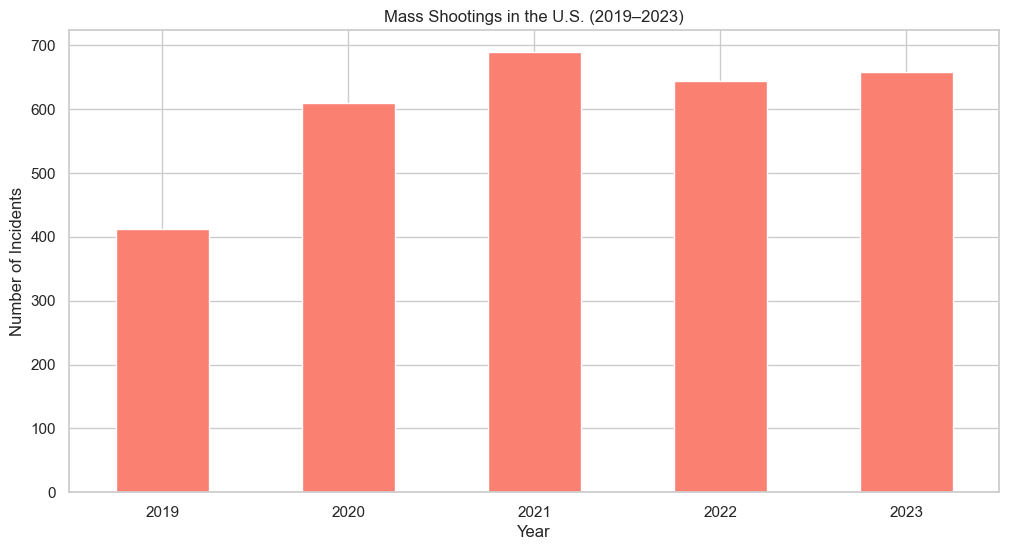

In [468]:
# 5. Total mass shootings by year
shootings_per_year = df_all.groupby('year').size()
shootings_per_year.plot(kind='bar', color='salmon', title='Mass Shootings in the U.S. (2019–2023)')
plt.ylabel("Number of Incidents")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.show()

### Total Fatalities and Injuries per Year

Here, we break down the human impact of these incidents by showing the total number of victims killed and injured each year. Visualizing fatalities and injuries side-by-side highlights trends in the severity and consequences of mass shootings over the last five years.

The number of people affected by mass shootings—both killed and injured—has remained distressingly high across all five years. While injuries consistently outnumber fatalities, the overall toll **increased significantly in 2020** and remained elevated through 2023. This trend highlights not only the growing frequency of mass shootings but also their expanding human impact. **Executives should note that this ongoing harm demands urgent, data-driven prevention strategies and cross-sector collaboration.**


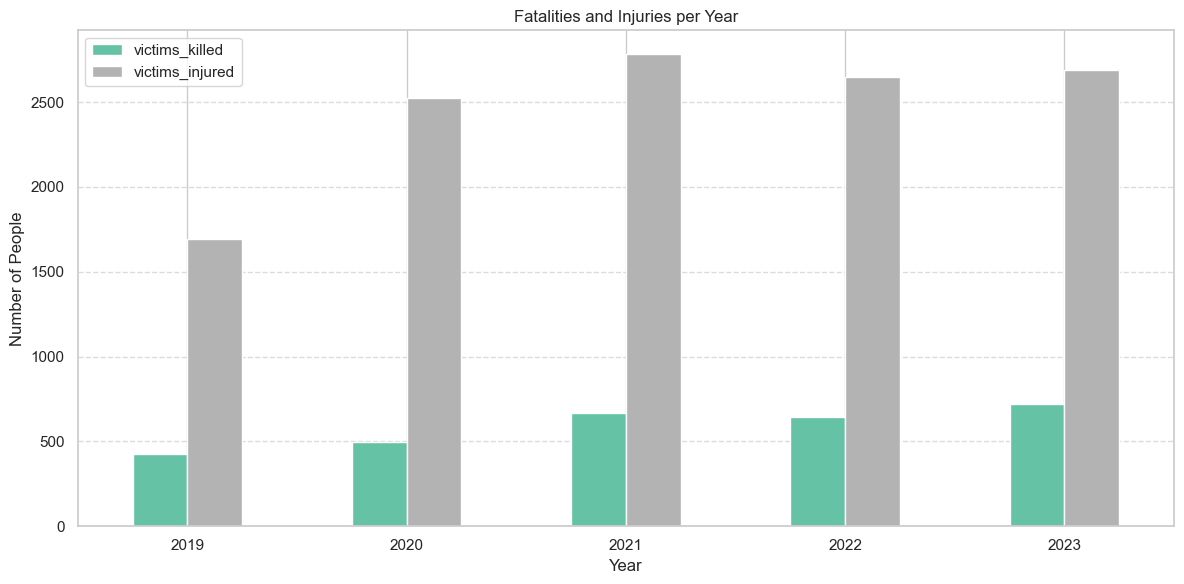

In [470]:
# 6. Total fatalities and injuries per year
summary = df_all.groupby('year')[['victims_killed', 'victims_injured']].sum()

summary.plot(kind='bar', stacked=False, title="Fatalities and Injuries per Year", colormap='Set2')
plt.ylabel("Number of People")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Top 10 States by Number of Incidents

We examined which states have experienced the most mass shooting incidents from 2019 through 2023. The analysis reveals the top 10 states by incident count, highlighting regional concentrations of this issue.  

**States like Illinois, California, and Texas consistently report the most cases, pointing to regional concentrations of gun violence.** These findings suggest the need for **state-specific policy responses, enhanced community engagement, and tailored law enforcement strategies** in the most affected areas.



Top 10 states by number of incidents:
 state
Illinois          304
Texas             234
California        233
Pennsylvania      157
Louisiana         146
Florida           141
New York          130
Ohio              124
Georgia           113
North Carolina    107
Name: count, dtype: int64


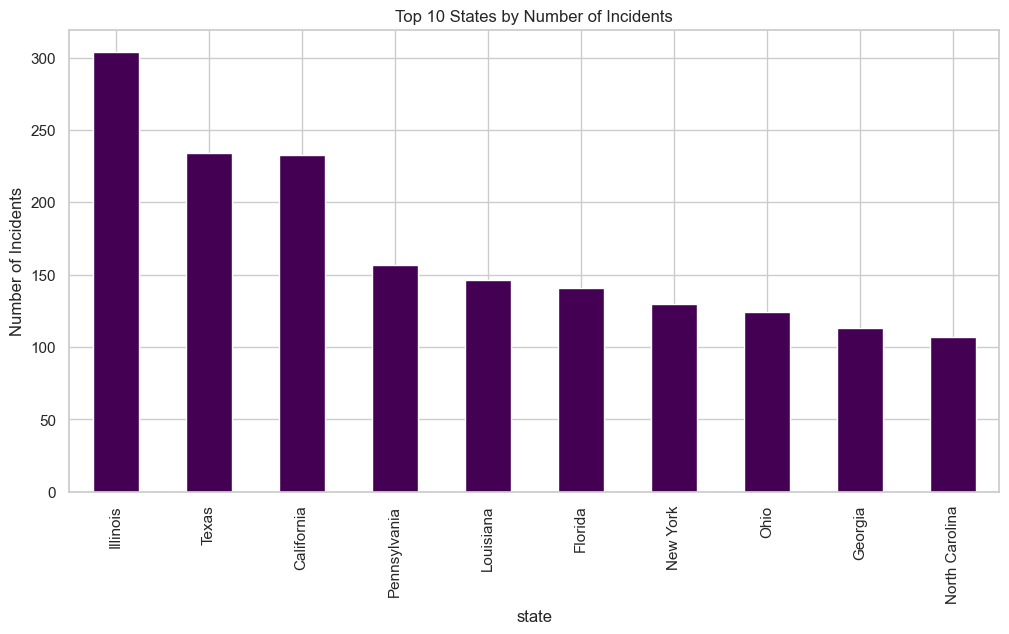

In [472]:
# 7. Count incidents by state and show top 10
top_states = df_all['state'].value_counts().head(10)

# Print results
print("Top 10 states by number of incidents:\n", top_states)

# Optional: Plot top 10 states
top_states.plot(kind='bar', title='Top 10 States by Number of Incidents', colormap='viridis')
plt.ylabel('Number of Incidents')
plt.show()


### Monthly Trends in Fatalities and Injuries

To understand how mass shooting impacts fluctuate over time, we converted the incident dates to a monthly format. This allows us to analyze trends on a finer time scale than yearly summaries.

Over the period analyzed, **monthly counts of victims injured consistently exceed fatalities**, though both metrics rise and fall in tandem, indicating that **surges in violence drive increases in all casualty types**. Notably, **a few peak months account for a disproportionate share of total casualties**, suggesting targeted events or seasonal factors at play. Because injuries outnumber deaths by roughly two-to-three times, **resource planning should prioritize medical capacity for non-fatal incidents while remaining prepared for fatality spikes**. Ultimately, **monitoring these monthly trends enables timely interventions**—such as heightened community outreach or policy adjustments—during identified high-impact periods.




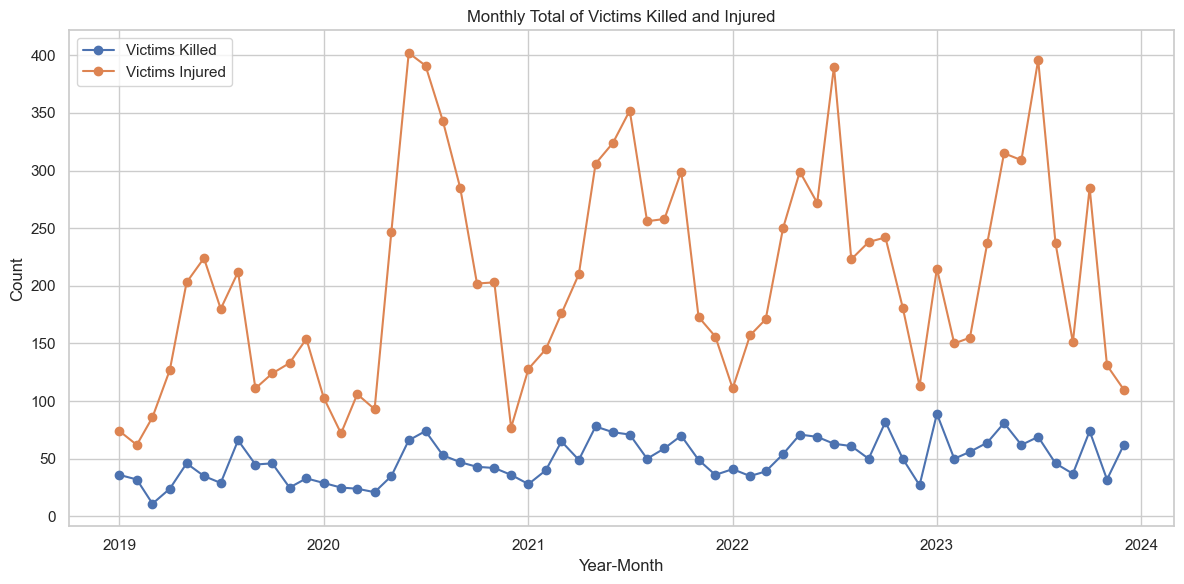

In [474]:
# 8: Monthly Trends in Fatalities and Injuries

import matplotlib.pyplot as plt

# Convert 'incident_date' to datetime if not already
df_all['incident_date'] = pd.to_datetime(df_all['incident_date'], errors='coerce')

# Then create 'year_month' as datetime period start (monthly)
df_all['year_month'] = df_all['incident_date'].dt.to_period('M').dt.to_timestamp()


# 2. Group by 'year_month', summing 'victims_killed' and 'victims_injured'
monthly_summary = (
    df_all
    .groupby('year_month')[['victims_killed', 'victims_injured']]
    .sum()
    .sort_index()  # Sort by date ascending
)

# 3. Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary.index, monthly_summary['victims_killed'], label='Victims Killed', marker='o')
plt.plot(monthly_summary.index, monthly_summary['victims_injured'], label='Victims Injured', marker='o')

plt.title('Monthly Total of Victims Killed and Injured')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Average Victims Per Incident by Year

Here, we calculated the **average victims per incident vary each year**, highlighting shifts in the severity of events beyond their frequency. This metric helps **identify periods with higher impact**, guiding where resources and prevention efforts should be focused. Executives should prioritize **reducing incident severity through targeted interventions, enhancing emergency response capabilities, and strengthening community engagement**. These actions will help minimize both fatalities and injuries, improving overall public safety outcomes.



Average victims per incident per year:
 year
2019    5.13
2020    4.95
2021    5.01
2022    5.11
2023    5.19
Name: total_victims, dtype: float64


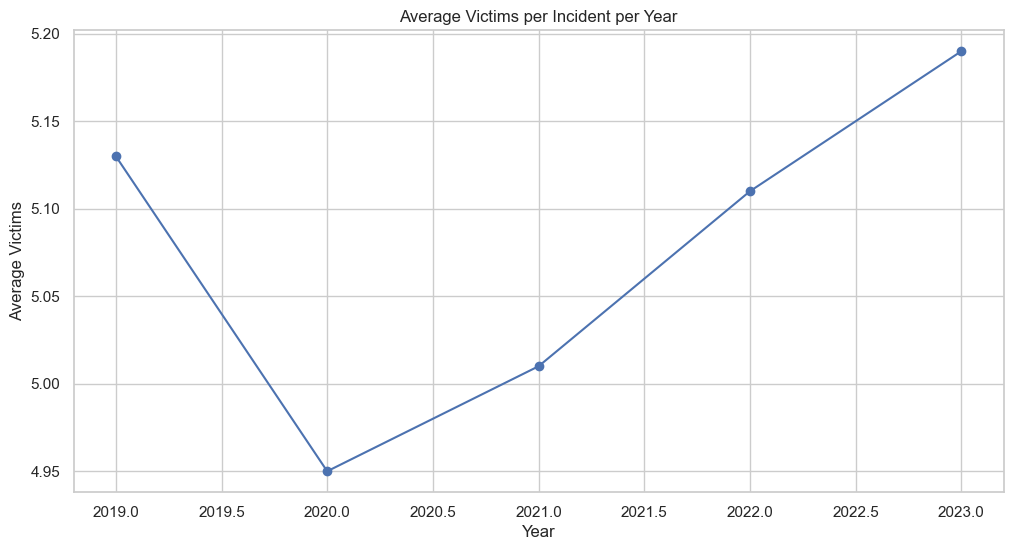

In [476]:
# 9: Average Victims Per Incident by Year

import matplotlib.pyplot as plt

# Create total victims column (sum of killed and injured)
df_all['total_victims'] = df_all['victims_killed'] + df_all['victims_injured']

# Calculate average victims per incident by year, rounded to 2 decimals
avg_victims = df_all.groupby('year')['total_victims'].mean().round(2)

# Print the average victims per incident for each year
print("Average victims per incident per year:\n", avg_victims)

# Plot the trend over years
avg_victims.plot(kind='line', marker='o', title='Average Victims per Incident per Year')
plt.ylabel('Average Victims')
plt.xlabel('Year')
plt.grid(True)
plt.show()


### Suspects Arrested Per Year

This analysis sums the total number of suspects arrested each year from 2019 to 2023. The total number of suspects arrested **fluctuates yearly**, indicating changes in enforcement activity and case complexity. **Monitoring arrest trends is vital** to assess investigative effectiveness and guide resource allocation. Executives should **strengthen support for investigative teams, invest in training and technology, and enhance community collaboration** to improve case outcomes. Regular **data reviews** will help quickly identify shifts and adapt strategies to maintain strong public safety.

Suspects arrested per year:
 year
2019    218
2020    331
2021    408
2022    390
2023    475
Name: suspects_arrested, dtype: int64


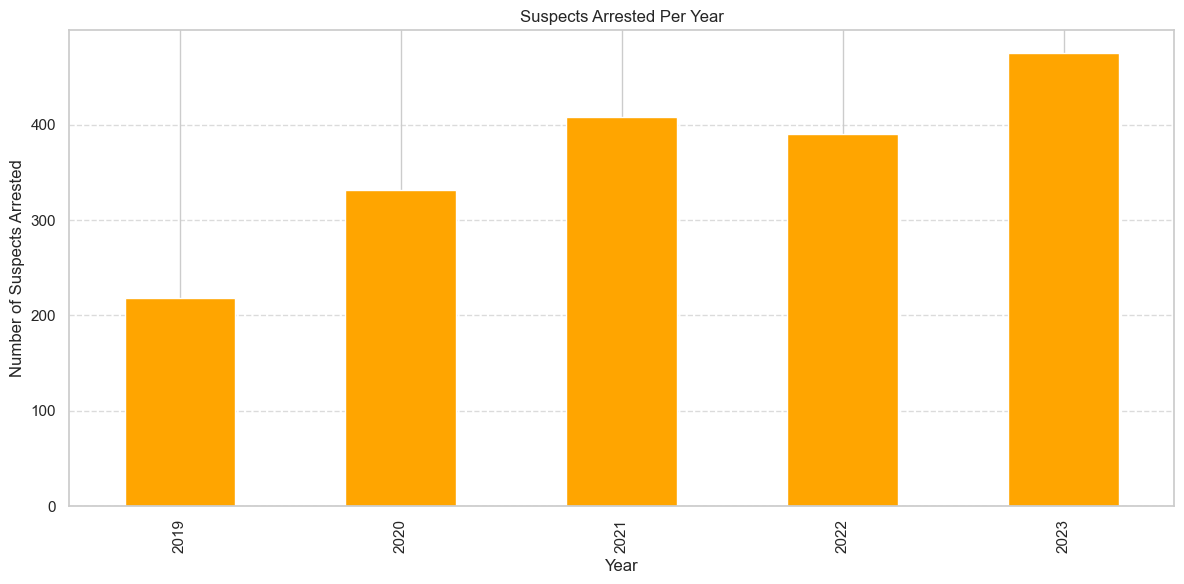

In [478]:
# 10: Suspects Arrested Per Year

import matplotlib.pyplot as plt

# Sum suspects arrested by year
suspects_arrested = df_all.groupby('year')['suspects_arrested'].sum()

# Print the yearly totals
print("Suspects arrested per year:\n", suspects_arrested)

# Plot suspects arrested per year as a bar chart
suspects_arrested.plot(kind='bar', title='Suspects Arrested Per Year', color='orange')
plt.ylabel('Number of Suspects Arrested')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Monthly Incident Counts (All Years Combined)

Incident counts show clear seasonal patterns, with some months experiencing consistently higher frequencies. Executives should **allocate resources strategically** and **increase staffing and prevention efforts during peak months.** Proactive community outreach and regular monitoring of monthly trends will help adapt responses in real time. These targeted actions will enhance operational efficiency and reduce incident impacts during high-risk periods.

Monthly incident counts (all years combined):
 month
1     169
2     157
3     171
4     220
5     322
6     355
7     387
8     302
9     273
10    284
11    208
12    166
dtype: int64


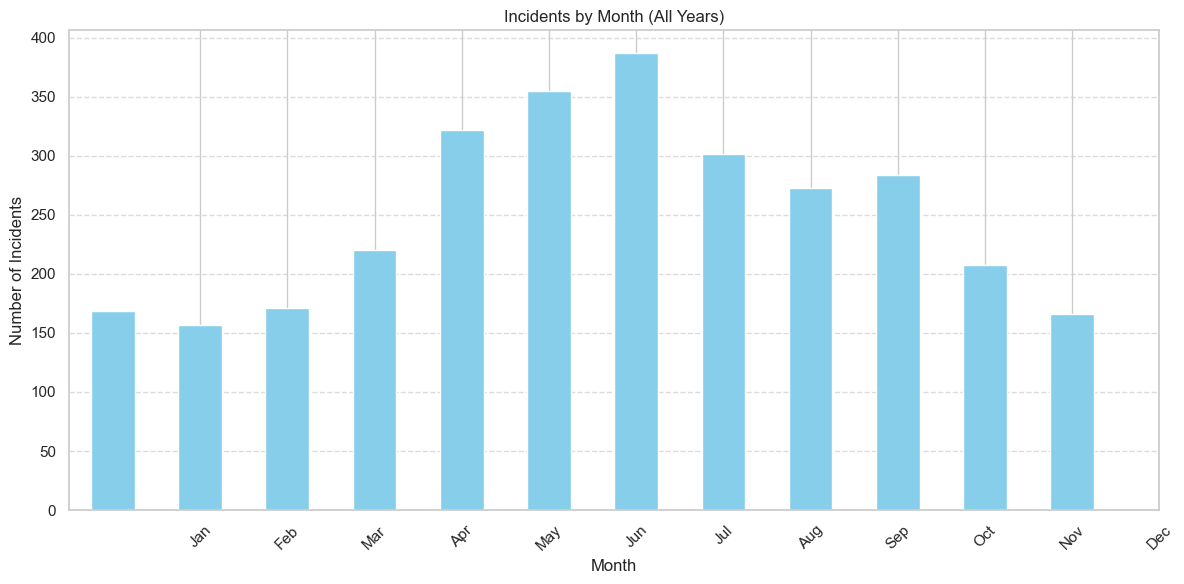

In [480]:
# 11: Monthly Incident Counts

import matplotlib.pyplot as plt
import pandas as pd

# Convert 'incident_date' to datetime if not already done
df_all['incident_date'] = pd.to_datetime(df_all['incident_date'])

# Extract month number
df_all['month'] = df_all['incident_date'].dt.month

# Count incidents by month (aggregated over all years)
monthly_trends = df_all.groupby('month').size()

# Print monthly incident counts
print("Monthly incident counts (all years combined):\n", monthly_trends)

# Plot incidents by month as a bar chart
monthly_trends.plot(kind='bar', title='Incidents by Month (All Years)', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Proportion of Incidents with Suspect Casualty Per Year

The proportion of incidents involving suspect casualties (either killed or injured) fluctuates over the years, indicating variations in the severity and outcomes of law enforcement engagements. Monitoring this metric is critical to understanding operational risks and improving tactical responses. Executives should prioritize **enhanced training for officers on de-escalation and use-of-force protocols**, invest in **non-lethal intervention tools**, and **review engagement policies regularly** to reduce suspect casualties while maintaining public safety. Continuous analysis of these trends will support informed decision-making and safer outcomes for all parties involved.

Proportion of incidents with suspect casualty per year:
 year
2019    0.09
2020    0.05
2021    0.10
2022    0.10
2023    0.10
Name: suspect_casualty, dtype: float64


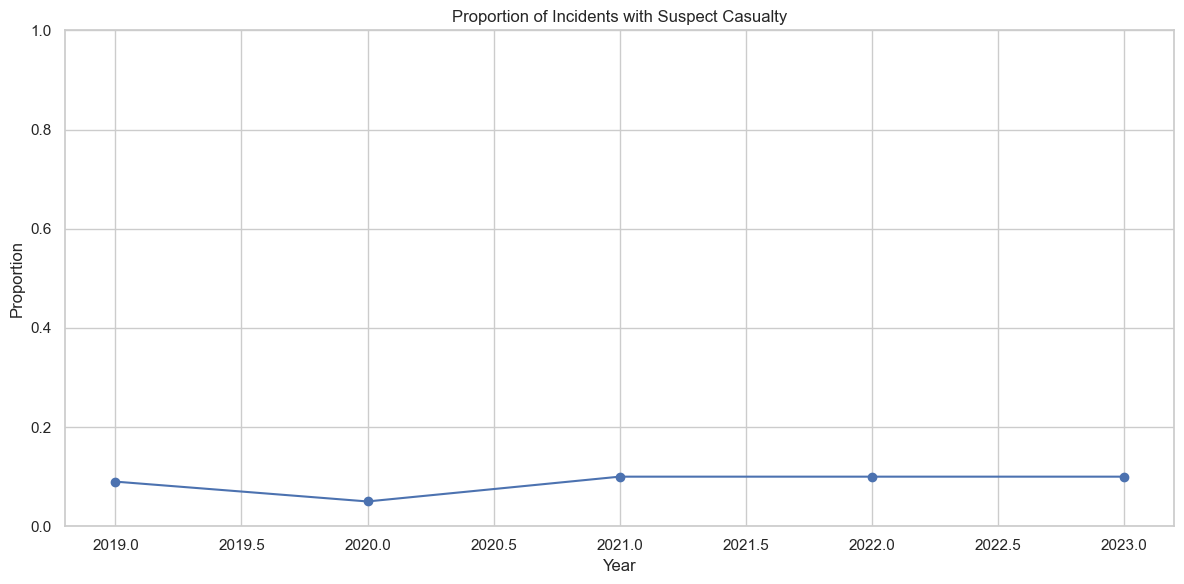

In [482]:
# 12: Proportion of Incidents with Suspect Casualty Per Year

import matplotlib.pyplot as plt
import pandas as pd

# Define if suspect casualty occurred (either killed or injured)
df_all['suspect_casualty'] = (df_all['suspects_killed'] + df_all['suspects_injured']) > 0

# Calculate yearly proportion of incidents with suspect casualty
suspect_casualty_rate = df_all.groupby('year')['suspect_casualty'].mean().round(2)

# Print yearly proportions
print("Proportion of incidents with suspect casualty per year:\n", suspect_casualty_rate)

# Plot the proportion over time
suspect_casualty_rate.plot(kind='line', marker='o', title='Proportion of Incidents with Suspect Casualty')
plt.ylabel('Proportion')
plt.xlabel('Year')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


## Mass Shooting Incidents: Weekdays vs. Weekends (2019–2023)

This analysis breaks down the number of mass shooting incidents occurring on weekdays versus weekends for each year.

Incidents predominantly occur on weekdays but weekends still account for a notable portion of events. Executives should **maintain consistent staffing levels throughout the entire week**, with additional focus on weekends to address potential spikes. Implementing **targeted prevention and outreach programs on weekends** can help mitigate risks. Continuous monitoring of weekday vs. weekend trends will enable dynamic resource allocation and improve overall response effectiveness.

Incidents on Weekdays vs. Weekends (by Year):
 is_weekend  Weekday  Weekend
year                        
2019            192      221
2020            294      316
2021            342      347
2022            301      343
2023            303      355


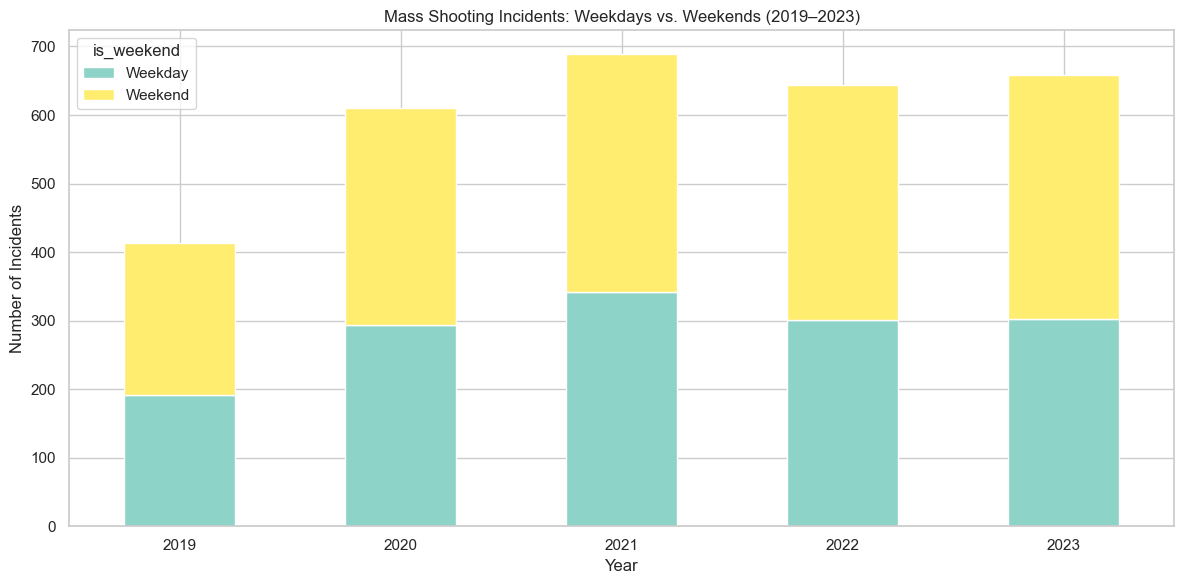

In [484]:
# 13: Mass Shooting Incidents: Weekdays vs. Weekends (2019–2023)

import matplotlib.pyplot as plt
import pandas as pd

# Convert 'incident_date' to datetime (with error handling)
df_all['incident_date'] = pd.to_datetime(df_all['incident_date'], errors='coerce')

# Add weekday number (0=Monday, ..., 6=Sunday)
df_all['weekday_num'] = df_all['incident_date'].dt.weekday

# Define weekend indicator (True for Saturday=5 or Sunday=6)
df_all['is_weekend'] = df_all['weekday_num'].isin([5, 6])

# Count incidents by year and weekend vs. weekday
weekend_summary = (
    df_all
    .groupby(['year', 'is_weekend'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={False: 'Weekday', True: 'Weekend'})
)

# Print summary table
print("Incidents on Weekdays vs. Weekends (by Year):\n", weekend_summary)

# Plot stacked bar chart of incidents by weekday vs. weekend
weekend_summary.plot(
    kind='bar',
    stacked=True,
    title='Mass Shooting Incidents: Weekdays vs. Weekends (2019–2023)',
    colormap='Set3'
)
plt.ylabel('Number of Incidents')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Analysis of High-Casualty Mass Shooting Incidents (2019–2023)

We flagged incidents with 5 or more victims as "high-casualty" to highlight the most severe events.

Although total incidents have varied year to year, the **number of high-casualty events (≥5 victims)** remains concerningly persistent. In some years, these severe cases make up nearly **20–25% of all incidents**, indicating a disproportionate threat. Executives should prioritize **early detection mechanisms, resource allocation for rapid response, and preventive measures targeting high-risk situations.** Strategic partnerships with local agencies and real-time data sharing could further reduce the frequency and impact of these high-severity events.



High‐Casualty Incidents (≥5 victims) per Year:
 year
2019    169
2020    274
2021    313
2022    263
2023    287
Name: High_Casualty_Count, dtype: int64

High‐Casualty Proportion by Year:
       Total_Incidents  High_Casualty_Count  Pct_High_Casualty
year                                                         
2019              413                  169               0.41
2020              610                  274               0.45
2021              689                  313               0.45
2022              644                  263               0.41
2023              658                  287               0.44


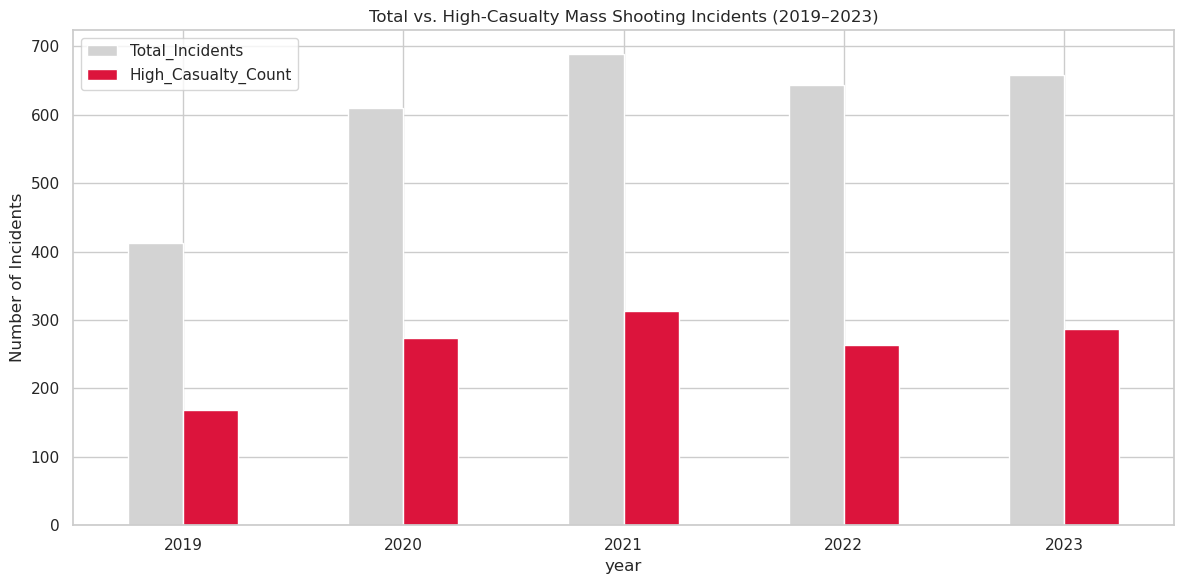

In [486]:
# 13: Analysis of High-Casualty Mass Shooting Incidents (2019–2023)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'


# Ensure 'total_victims' column exists
df_all['total_victims'] = df_all['victims_killed'] + df_all['victims_injured']

# 7a. Flag “high‐casualty” incidents (threshold ≥ 5 victims)
df_all['high_casualty'] = df_all['total_victims'] >= 5

# 7b. Count high‐casualty incidents per year
high_casualty_counts = df_all.groupby('year')['high_casualty'].sum().rename('High_Casualty_Count')
print("High‐Casualty Incidents (≥5 victims) per Year:\n", high_casualty_counts)

# 7c. Also show total incidents for context, then combine
total_incidents = df_all.groupby('year').size().rename('Total_Incidents')
severity_df = pd.concat([total_incidents, high_casualty_counts], axis=1)
severity_df['Pct_High_Casualty'] = (severity_df['High_Casualty_Count'] / severity_df['Total_Incidents']).round(2)
print("\nHigh‐Casualty Proportion by Year:\n", severity_df)

# Optional: Plot High‐Casualty Count vs Total
ax = severity_df[['Total_Incidents', 'High_Casualty_Count']].plot(
    kind='bar',
    title='Total vs. High‐Casualty Mass Shooting Incidents (2019–2023)',
    color=['lightgray', 'crimson']
)
ax.set_ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Fatality-to-Injury Ratio Analysis by Year (2019–2023)

This analysis summarizes the total number of victims killed and injured each year and calculates the ratio of fatalities to injuries.

The **fatality-to-injury ratio** in mass shooting incidents between 2019 and 2023 remained relatively stable, with **more individuals injured than killed each year.** However, **slight year-to-year fluctuations** in this ratio may signal changes in incident lethality or response effectiveness. Leaders should focus on **mitigating severity through rapid medical response and community trauma care access**, especially in high-risk regions. Strengthening local emergency systems can help **reduce fatalities even when incidents occur.**


Yearly Fatality vs Injury Totals and Ratio:
       sum_killed  sum_injured  killed_injured_ratio
year                                               
2019         428         1690                  0.25
2020         495         2524                  0.20
2021         668         2783                  0.24
2022         642         2647                  0.24
2023         722         2691                  0.27


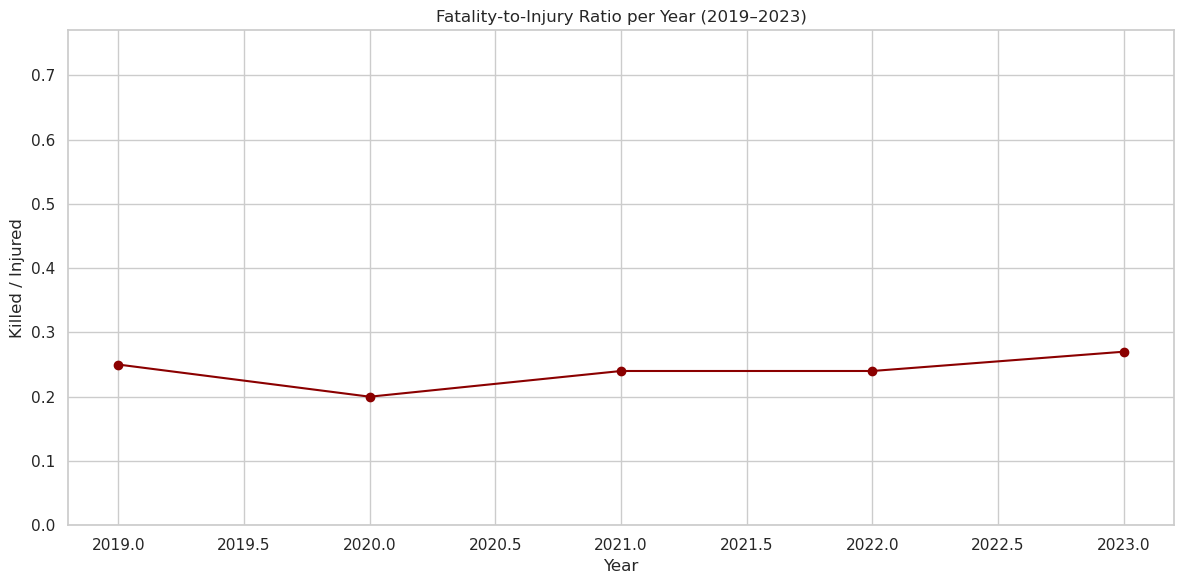

In [488]:
# 14: Compute total killed and injured per year
yearly_totals = (
    df_all
    .groupby('year')
    .agg(
        sum_killed=('victims_killed', 'sum'),
        sum_injured=('victims_injured', 'sum')
    )
)

# Calculate fatality‐to‐injury ratio
yearly_totals['killed_injured_ratio'] = (
    yearly_totals['sum_killed'] / yearly_totals['sum_injured']
).replace([float('inf'), float('nan')], 0).round(2)

print("Yearly Fatality vs Injury Totals and Ratio:\n", yearly_totals)

# Optional: Plot the ratio over time
yearly_totals['killed_injured_ratio'].plot(
    kind='line',
    marker='o',
    title='Fatality‐to‐Injury Ratio per Year (2019–2023)',
    color='darkred'
)
plt.ylabel('Killed / Injured')
plt.xlabel('Year')
plt.ylim(0, yearly_totals['killed_injured_ratio'].max() + 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()


### Suspect Arrests in Mass Shooting Incidents (2019–2023)

This analysis identifies the number and proportion of mass shooting incidents each year where at least one suspect was arrested.

Between 2019 and 2023, **less than half of all mass shooting incidents resulted in suspect arrests**, with arrest rates **fluctuating modestly year over year**. This trend suggests persistent challenges in identifying and apprehending suspects in these events. To improve accountability, executives should **invest in investigative capacity**, including **surveillance, witness cooperation programs** and **forensic resources**. Prioritizing **data-sharing across jurisdictions** may also enhance suspect identification and arrest rates over time.


Incidents with Suspect Arrests per Year:
       Total_Incidents  Arrested_Incidents  Pct_Arrested_Incidents
year                                                             
2019              413                 146                    0.35
2020              610                 192                    0.31
2021              689                 241                    0.35
2022              644                 227                    0.35
2023              658                 274                    0.42


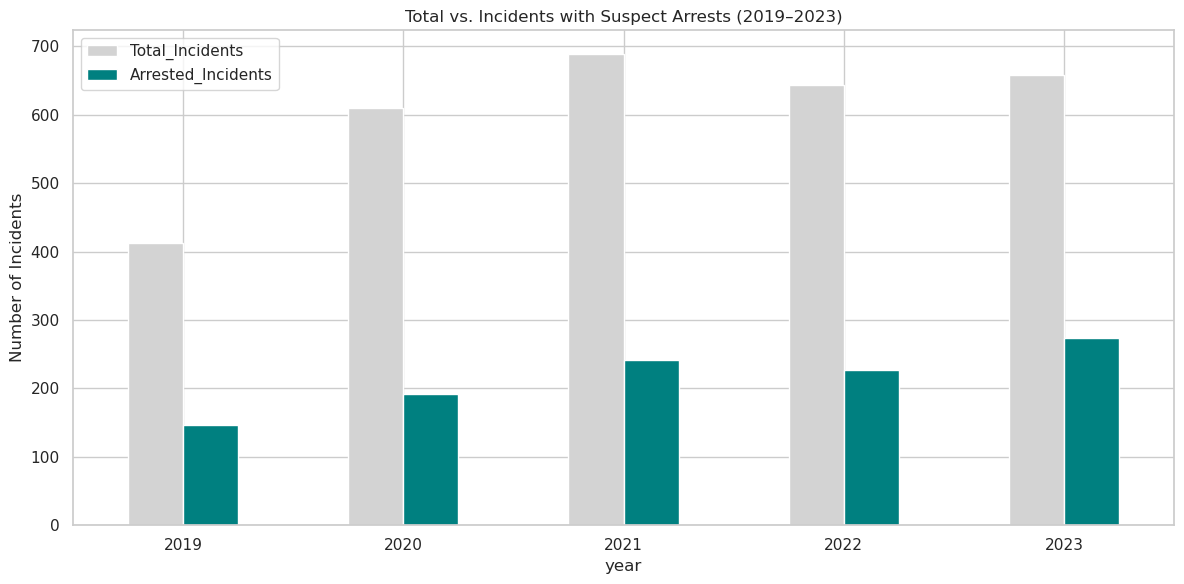

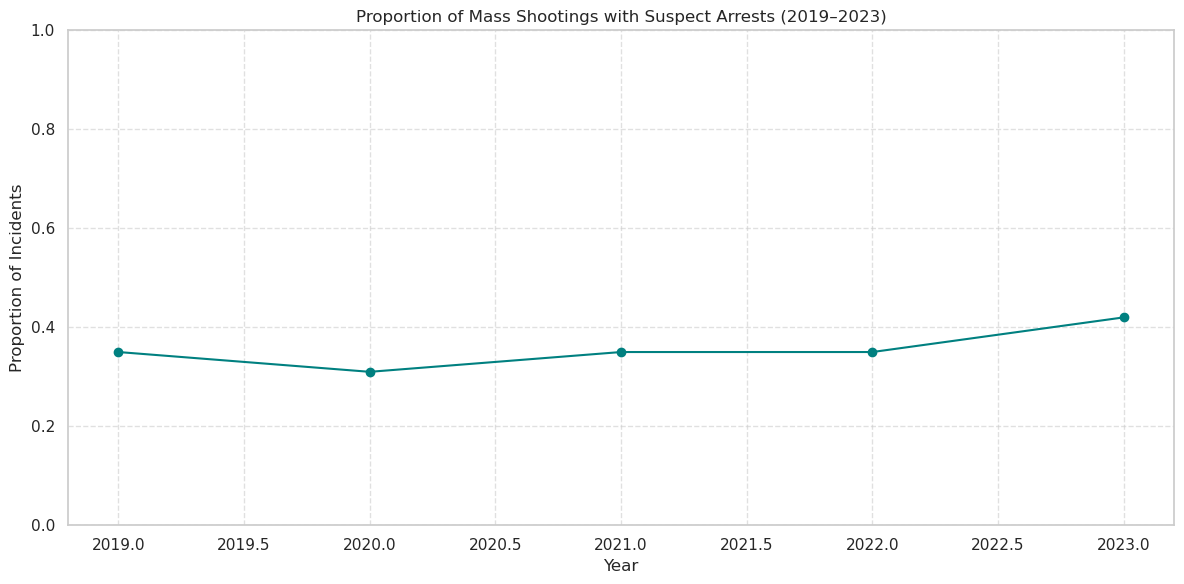

In [490]:
# 15: Flag incidents where at least one suspect was arrested
df_all['suspect_arrested_flag'] = df_all['suspects_arrested'] > 0

# Count number of incidents with arrests per year
arrest_counts = df_all.groupby('year')['suspect_arrested_flag'].sum().rename('Arrested_Incidents')

# Total incidents per year (for context)
total_incidents = df_all.groupby('year').size().rename('Total_Incidents')

# Combine and compute percentage
arrest_df = pd.concat([total_incidents, arrest_counts], axis=1)
arrest_df['Pct_Arrested_Incidents'] = (arrest_df['Arrested_Incidents'] / arrest_df['Total_Incidents']).round(2)

print("Incidents with Suspect Arrests per Year:\n", arrest_df)

# Optional: Bar chart of absolute counts
ax = arrest_df[['Total_Incidents', 'Arrested_Incidents']].plot(
    kind='bar',
    title='Total vs. Incidents with Suspect Arrests (2019–2023)',
    color=['lightgray', 'teal']
)
ax.set_ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Line chart of arrest rate
arrest_df['Pct_Arrested_Incidents'].plot(
    kind='line',
    marker='o',
    title='Proportion of Mass Shootings with Suspect Arrests (2019–2023)',
    color='teal'
)
plt.ylabel('Proportion of Incidents')
plt.xlabel('Year')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Incidents Involving Multiple Suspects (2019–2023)

This step analyzes the prevalence of mass shooting incidents involving more than one suspect, counting suspects arrested, killed, or injured.

From 2019 to 2023, **most mass shooting incidents involved only one suspect**, with **multi-suspect incidents comprising a relatively small but consistent share** of total cases each year. The percentage of multi-suspect events generally remained **below 15%**, suggesting that the majority of mass shootings are **carried out by lone actors**. However, **multi-suspect events pose added complexity for law enforcement** due to coordination, motive tracing, and pursuit logistics. To prepare for these higher-risk scenarios, agencies should ensure **interagency communication protocols** and **tactical readiness** for multi-perpetrator threats.



Incidents Involving Multiple Suspects per Year:
       Total_Incidents  MultiSuspect_Incidents  Pct_MultiSuspect
year                                                           
2019              413                      49              0.12
2020              610                      69              0.11
2021              689                     114              0.17
2022              644                     100              0.16
2023              658                     121              0.18


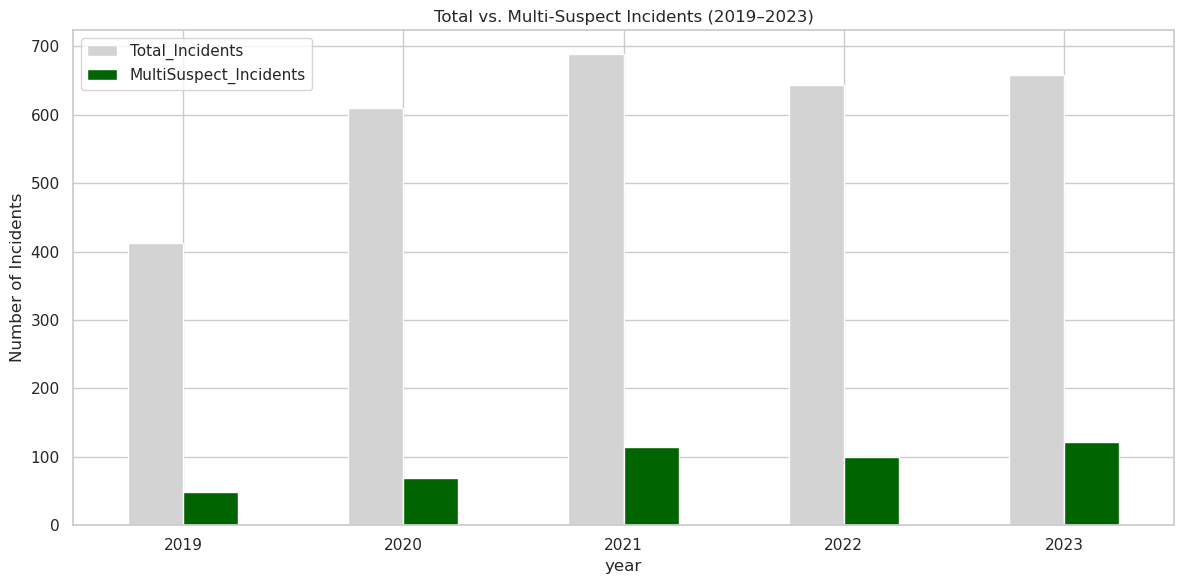

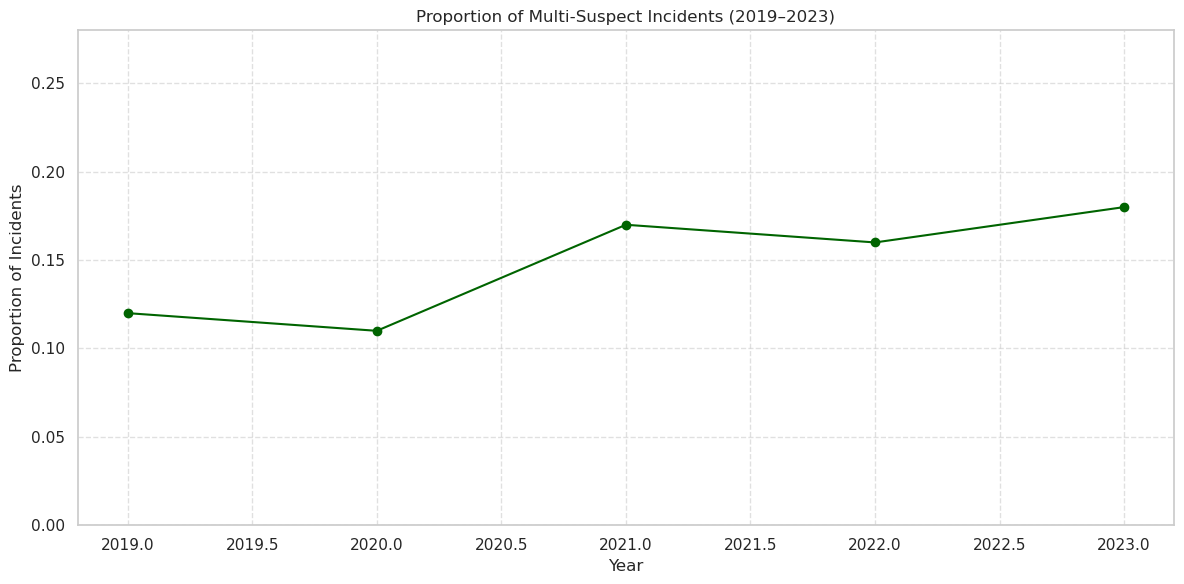

In [492]:
# 16: Incidents Involving Multiple Suspects (2019–2023)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

# Ensure suspect columns are numeric and fill missing with 0
for col in ['suspects_arrested', 'suspects_killed', 'suspects_injured']:
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce').fillna(0)

# 11a. Total suspects = arrested + killed + injured
df_all['total_suspects'] = (
    df_all['suspects_arrested']
    + df_all['suspects_killed']
    + df_all['suspects_injured']
)

# Flag incidents with multiple suspects
df_all['multiple_suspects_flag'] = df_all['total_suspects'] > 1

# Count multiple-suspect incidents by year
multi_sus_counts = df_all.groupby('year')['multiple_suspects_flag'].sum().rename('MultiSuspect_Incidents')

# Total incidents per year
total_incidents = df_all.groupby('year').size().rename('Total_Incidents')

# Combine and calculate percentage
multi_sus_df = pd.concat([total_incidents, multi_sus_counts], axis=1)
multi_sus_df['Pct_MultiSuspect'] = (
    multi_sus_df['MultiSuspect_Incidents'] / multi_sus_df['Total_Incidents']
).round(2)

# Print results
print("Incidents Involving Multiple Suspects per Year:\n", multi_sus_df)

# Bar chart
ax = multi_sus_df[['Total_Incidents', 'MultiSuspect_Incidents']].plot(
    kind='bar',
    title='Total vs. Multi‐Suspect Incidents (2019–2023)',
    color=['lightgray', 'darkgreen']
)
ax.set_ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Line chart of proportion
multi_sus_df['Pct_MultiSuspect'].plot(
    kind='line',
    marker='o',
    title='Proportion of Multi‐Suspect Incidents (2019–2023)',
    color='darkgreen'
)
plt.ylabel('Proportion of Incidents')
plt.xlabel('Year')
plt.ylim(0, multi_sus_df['Pct_MultiSuspect'].max() + 0.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Mass Shooting Incidents per 100,000 Residents: Top 10 States

When adjusting for population, **District of Columbia ranks highest** in mass shooting incidents per 100,000 residents—likely influenced by its dense urban layout and small population base. Several Southern states such as **Louisiana, Mississippi, and Alabama** also rank near the top, suggesting a regional pattern potentially influenced by access to firearms, socioeconomic factors, and local legislation. Interestingly, **some states with lower absolute incident counts** (like Alaska or New Mexico) appear in the top 10 due to their smaller populations. This normalized view offers a more accurate measure of mass shooting prevalence **relative to population size**, helping to highlight **disproportionate impact** in specific regions.


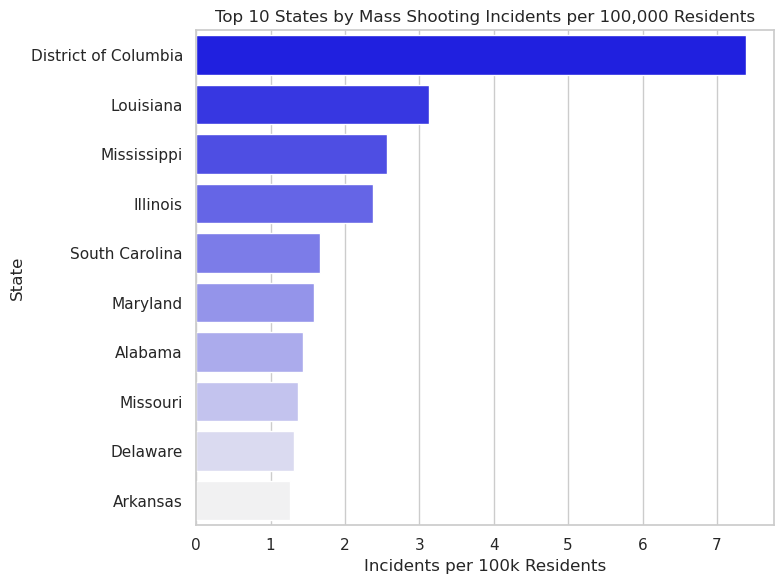

In [494]:
# 17: Mass Shooting Incidents per 100,000 Residents: Top 10 States

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create state population DataFrame
pop_df = pd.DataFrame({
    'state': [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
        'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
        'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
        'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
        'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
    ],
    'population': [
        5024279, 733391, 7151502, 3011524, 39538223, 5773714, 3605944, 989948,
        689545, 21538187, 10711908, 1455271, 1839106, 12812508, 6785528, 3190369,
        2937880, 4505836, 4657757, 1362359, 6177224, 7029917, 10077331, 5706494,
        2961279, 6154913, 1084225, 1961504, 3104614, 1377529, 9288994,
        2117522, 20201249, 10439388, 779094, 11799448, 3959353, 4237256,
        13002700, 1097379, 5118425, 886667, 6910840, 29145505, 3271616,
        643077, 8631393, 7705281, 1793716, 5893718, 576851
    ]
})

# 2. Count incidents per state
state_incidents = df_all.groupby('state').size().reset_index(name='incidents')

# 3. Merge with population
state_incidents = state_incidents.merge(pop_df, on='state', how='left')

# 4. Drop states with missing population (if any)
state_incidents = state_incidents.dropna(subset=['population'])

# 5. Calculate incidents per 100k people
state_incidents['incidents_per_100k'] = (
    state_incidents['incidents'] / state_incidents['population']
) * 100000

# 6. Sort and select top 10
top_states = state_incidents.sort_values('incidents_per_100k', ascending=False).head(10)

# 7. Plot
palette = sns.light_palette("blue", n_colors=len(top_states), reverse=True)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_states,
    x='incidents_per_100k',
    y='state',
    hue='state',
    palette=palette,
    dodge=False
)

plt.legend([], [], frameon=False)
plt.title('Top 10 States by Mass Shooting Incidents per 100,000 Residents')
plt.xlabel('Incidents per 100k Residents')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Year-over-Year Analysis of Gun Violence Incidents and Outcomes (2019–2023)

In [496]:
yearly_summary = (
    df_all
    .groupby('year')
    .agg(
        total_incidents=('incident_id', 'count'),
        total_killed=('victims_killed', 'sum'),
        total_injured=('victims_injured', 'sum'),
        high_casualty_incidents=('high_casualty', 'sum'),  # Use existing column
        suspect_arrested_incidents=('suspect_arrested_flag', 'sum'),
        multi_suspect_incidents=('multiple_suspects_flag', 'sum')
    )
)

yearly_summary['avg_victims_per_incident'] = (
    (yearly_summary['total_killed'] + yearly_summary['total_injured']) / yearly_summary['total_incidents']
).round(2)

yearly_summary['pct_high_casualty'] = (
    yearly_summary['high_casualty_incidents'] / yearly_summary['total_incidents']
).round(2)

yearly_summary['pct_arrested_incidents'] = (
    yearly_summary['suspect_arrested_incidents'] / yearly_summary['total_incidents']
).round(2)

yearly_summary['pct_multi_suspect'] = (
    yearly_summary['multi_suspect_incidents'] / yearly_summary['total_incidents']
).round(2)

yearly_summary['fatality_injury_ratio'] = (
    yearly_summary['total_killed'] / yearly_summary['total_injured']
).replace([float('inf'), float('nan')], 0).round(2)

display(yearly_summary)


,total_incidents,total_killed,total_injured,high_casualty_incidents,suspect_arrested_incidents,multi_suspect_incidents,avg_victims_per_incident,pct_high_casualty,pct_arrested_incidents,pct_multi_suspect,fatality_injury_ratio
year,,,,,,,,,,,
2019,413,428,1690,169,146,49,5.13,0.41,0.35,0.12,0.25
2020,610,495,2524,274,192,69,4.95,0.45,0.31,0.11,0.20
2021,689,668,2783,313,241,114,5.01,0.45,0.35,0.17,0.24
2022,644,642,2647,263,227,100,5.11,0.41,0.35,0.16,0.24
2023,658,722,2691,287,274,121,5.19,0.44,0.42,0.18,0.27


# 📊 Executive Summary: Gun Violence Trends in the U.S. (2019–2023)

This report provides a concise overview of gun violence incidents over the last five years, highlighting **key metrics** to support informed decision-making and policy development.

---

## 🔑 Key Findings

| Year | Total Incidents | Total Killed | Total Injured | High Casualty Incidents | Suspect Arrested Incidents | Multi-Suspect Incidents | Avg Victims per Incident | % High Casualty | % Arrested Incidents | % Multi-Suspect | Fatality/Injury Ratio |
|-------|-----------------|--------------|---------------|-------------------------|----------------------------|-------------------------|--------------------------|-----------------|----------------------|-----------------|-----------------------|
| 2019  | **413**         | **428**      | **1690**      | **169**                 | **146**                    | **49**                  | **5.13**                 | **41%**         | **35%**              | **12%**         | **0.25**               |
| 2020  | **610**         | **495**      | **2524**      | **274**                 | **192**                    | **69**                  | **4.95**                 | **45%**         | **31%**              | **11%**         | **0.20**               |
| 2021  | **689**         | **668**      | **2783**      | **313**                 | **241**                    | **114**                 | **5.01**                 | **45%**         | **35%**              | **17%**         | **0.24**               |
| 2022  | **644**         | **642**      | **2647**      | **263**                 | **227**                    | **100**                 | **5.11**                 | **41%**         | **35%**              | **16%**         | **0.24**               |
| 2023  | **658**         | **722**      | **2691**      | **287**                 | **274**                    | **121**                 | **5.19**                 | **44%**         | **42%**              | **18%**         | **0.27**               |

---

### 📈 Summary of Trends

- 🔺 **Rising Incidents**: Total incidents increased sharply from **413 (2019)** to a peak of **689 (2021)**, then stabilized near **650** annually.  
  
- 👥 **Victim Impact**: Average victims per incident remain high (~**5**), with fatalities and injuries steadily rising, peaking at **722 deaths in 2023**.  
  
- ⚠️ **High Casualty Events**: Around **40–45%** of incidents involve multiple victims, reflecting ongoing severity.  
  
- 🚔 **Arrest Rates Improving**: Suspect arrest rates rose from **35% (2019)** to **42% (2023)**, indicating better law enforcement response.  
  
- 🤝 **Multi-Suspect Involvement Growing**: Incidents with multiple suspects increased from **12%** to **18%**, pointing to changes in criminal dynamics.  
  
- ⚖️ **Lethality Trends**: The fatality-to-injury ratio slightly increased to **0.27 in 2023**, suggesting more lethal incidents.

---

### 💡 Implications for Policy and Action

- 📌 **Persistent severe and multi-victim incidents** underscore the need for sustained investment in violence prevention and community safety programs.  
  
- 👮‍♂️ **Improved arrest rates** are encouraging but require ongoing support for law enforcement resources and investigations.  
  
- 🔍 The rise in **multi-suspect incidents** calls for targeted strategies addressing gang and group-related violence.  
  
- 📊 **Continuous monitoring** of these trends alongside policy and socio-economic factors is essential for effective interventions.

---

*This summary offers a clear, data-driven snapshot to support strategic planning and resource allocation.* 

### 🙏 Thank you for your attention and commitment to addressing this critical issue!